In [92]:
import pandas as pd
import numpy as np

In [93]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
students_perfomance = pd.read_csv('data/StudentsPerformance.csv')

In [95]:
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
students_perfomance = students_perfomance.rename(columns= {
 'parental level of education': 'parental_level_of_education',
 'test preparation course': 'test_preparation_course',
 'math score': 'math_score',
 'reading score': 'reading_score',
 'writing score': 'writing_score'})

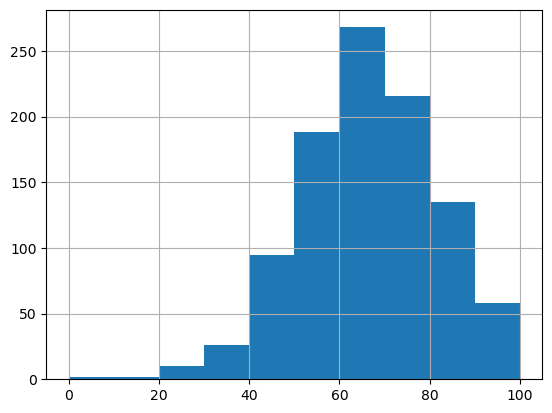

In [97]:
students_perfomance.math_score.hist();

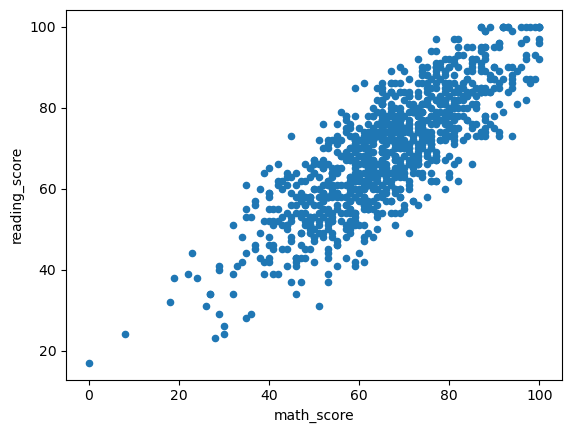

In [98]:
students_perfomance.plot.scatter(x='math_score', y='reading_score');

c:\Users\Pong\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


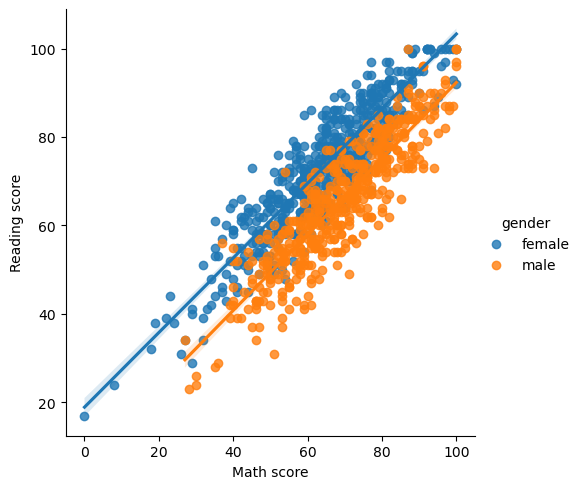

In [99]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perfomance)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score');

In [100]:
df = pd.read_csv('data/income.csv')
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


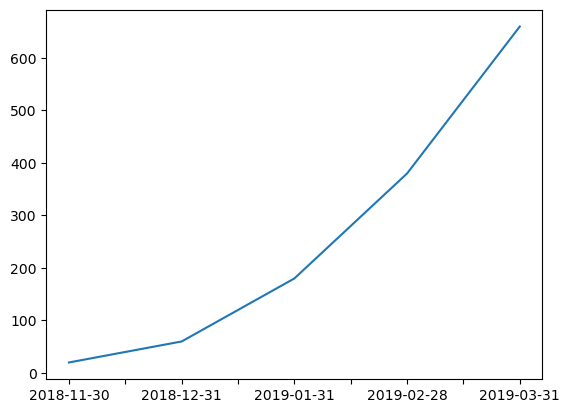

In [101]:
# df['income'].plot()
# plt.plot(df.index, df.income)
# df.plot()
# df.plot(kind='line')
# sns.lineplot(data=df)
# sns.lineplot(x=df.index, y=df.income)
df.income.plot();

In [102]:
df = pd.read_csv('data/genome_matrix.csv', index_col=0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


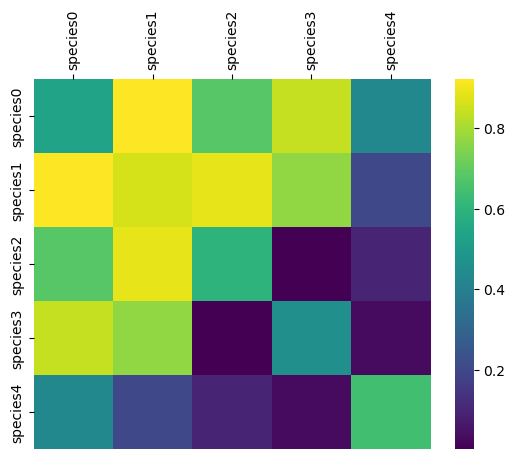

In [103]:
g = sns.heatmap(data=df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90);

In [104]:
df_dota = pd.read_csv('data/dota_hero_stats.csv', index_col=0)
df_dota.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [105]:
lenths = [len(r.split(',')) for r in df_dota.roles]
df_dota['lenths'] = lenths
df_dota.lenths.mode()

0    4
Name: lenths, dtype: int64

In [106]:
df_dota.roles.str.split(',').apply(len).mode()

0    4
Name: roles, dtype: int64

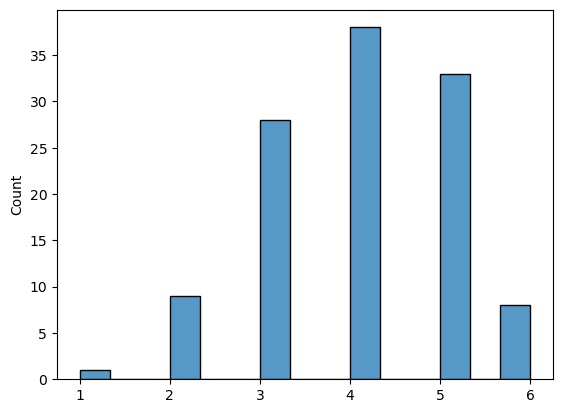

In [107]:
sns.histplot([x.count(',')+1 for x in df_dota.roles], bins=15);

In [108]:
df_dota.roles.map(eval).map(len).mode()

0    4
Name: roles, dtype: int64

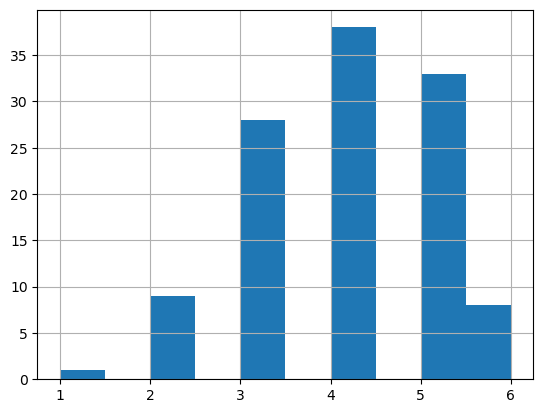

In [109]:
df_dota['roles'].agg(lambda x: len(x.split(','))).hist();

In [110]:
df_iris = pd.read_csv('data/iris.csv', index_col=0)
df_iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: ylabel='Density'>

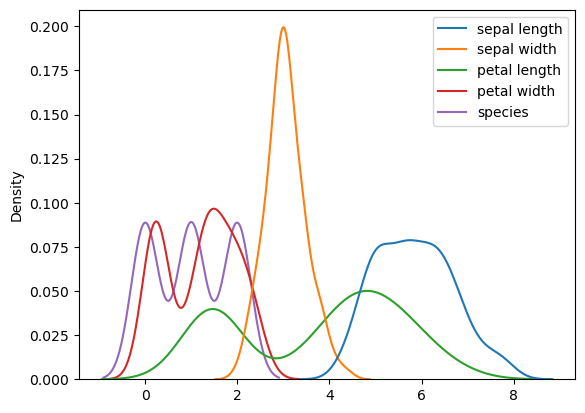

In [111]:
sns.kdeplot(data=df_iris)

In [112]:
# for column in df_iris:
#     sns.displot(data=df_iris[column])

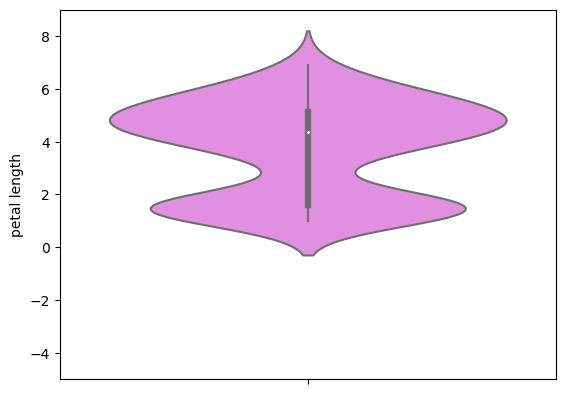

In [113]:
sns.violinplot(data=df_iris, y='petal length', color='violet')
plt.ylim(-5, 9)
plt.show()

c:\Users\Pong\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


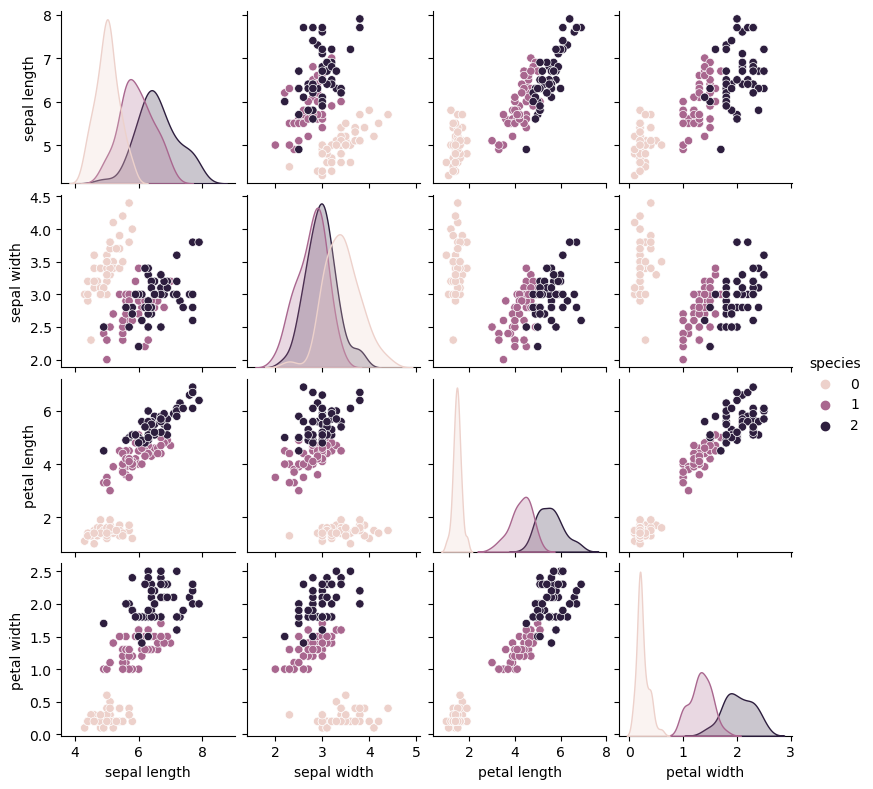

In [114]:
sns.pairplot(df_iris, hue="species", height=2)

<Axes: >

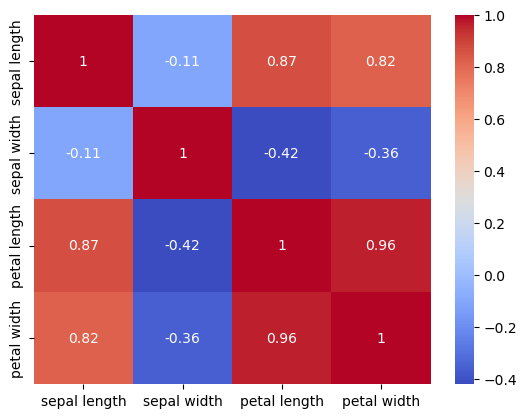

In [115]:
sns.heatmap(df_iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')

In [116]:
my_data = pd.DataFrame({'type' : ['A', 'A', 'B', 'B'], 'value' : [10, 14, 12, 23]})
my_data = pd.DataFrame({'type': list('AABB'), 'value': [10, 14, 12, 23]})
my_data = pd.DataFrame([['A', 10],['A',14],['B',12],['B', 23]], columns=['type','value'])
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [117]:
my_stat = pd.read_csv('data/my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [118]:
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [119]:
# %timeit subset_2 = my_stat.iloc[:, [1, 3]][~my_stat.index.isin([0, 4])]
# %timeit subset_2 = my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]
# %timeit subset_2 = my_stat.iloc[:, [1, 3]].drop([0, 4], axis=0)



In [120]:
subset_2 = my_stat.iloc[:, [1, 3]][~my_stat.index.isin([0, 4])]
subset_2.head()

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0


In [121]:
subset_1 = my_stat.query("(V1 > 0) & (V3 == 'A')")
subset_1.head()

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0


In [122]:
subset_2 = my_stat.query("(V2 != 10) | (V4 >= 1)")
subset_2.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0


In [123]:
# %timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
# %timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
# %timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
# %timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )

In [128]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [ ]:
my_stat=my_stat.assign(V5 = my_stat.V1 + my_stat.V4, V6 = np.log(my_stat.V2));